#**<font color='black'><b>Logistic Regression TITANIC Dataset**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/titanic.csv', sep='\t', engine='python')

In [ ]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


<Axes: >

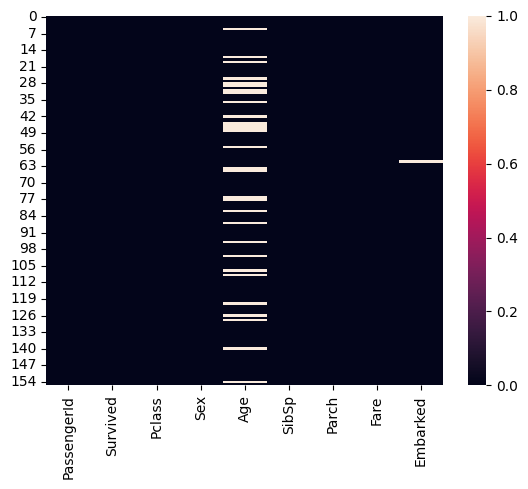

In [ ]:
df.info()
sb.heatmap(df.isnull())

In [ ]:
df['Age'] = df['Age'].interpolate()

In [ ]:
df = df.dropna()

In [ ]:
# dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [ ]:
#add these dummy columns to the original dataset
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  155 non-null    int64  
 1   Survived     155 non-null    int64  
 2   Pclass       155 non-null    int64  
 3   Age          155 non-null    float64
 4   SibSp        155 non-null    int64  
 5   Parch        155 non-null    int64  
 6   Fare         155 non-null    float64
 7   C            155 non-null    bool   
 8   Q            155 non-null    bool   
 9   S            155 non-null    bool   
 10  female       155 non-null    bool   
 11  male         155 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 10.4 KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,4,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,5,0,3,35.0,0,0,8.0500,False,False,True,False,True


In [ ]:
# Seperate the dataframe into X and y data
X = df.values
y = df['Survived'].values
# Delete the Survived column from X
X = np.delete(X,1,axis=1)

In [ ]:
# Split 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7872340425531915

In [ ]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  4],
       [ 6,  6]])

In [ ]:
# Using Random Forest Classifier
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)


0.7872340425531915

In [ ]:
#Using Gradient Boosting Classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7021276595744681

In [ ]:
#  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7446808510638298